<img src='https://lh3.googleusercontent.com/b8Cmw_ouaEGOrfNOonyOfHYwvZCQDgPwdpkZGyZr3UEpbKb_vLfBHRgJcuZW_GtWmi61ODYvHjACskutfMLkriDyWhVNfwEJrbqYjTFjuH8wsUcWaby-hCYRQErX3SigVZbF0pKjOQ' alt="" width="700" height="250"/>


<br><br>
<p style="font-family: Arial;font-size:3.5em; color:#09bef3; font-style:bold; text-align:center">
LimFinity Institute of Technology
</p>

<p style="font-family: Arial; font-size:2em;color:#09bef3; font-style:normal; text-align:center; font-weight: bold"><br><br>

استخدام التكتل لتحليل توجهات اعضاء الكونغرس الامريكي
<br>
<br><br>
<img src='https://lh3.googleusercontent.com/KNARpmZmZbReEseduex5vG1_vUthn5opuSYrt5bhjR5X5T3dVeJY1KZ0JPii6Nz7Rd-q3tTasZTH3pW2ulkm3_JrbOd34VFRBnKUKAZ9vVWkf2OqiCCK6cFavLCLlsX4DuU7NIDNMQ' alt="" width="800" height="200"/>





<p style="font-family: Arial; font-size:1.75em;color:#09bef3; font-style:bold; text-align:right; direction: rtl; font-weight: bold" ><br>

مصدر البيانات: موقع GovTrack الامريكي</p>

<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>
في هذا المشروع سوف نستخدم التكتل (Clustering) والذي هو احد فروع تعليم الالة بدون اشراف سنستخدمه في تحليل بيانات اعضاء مجلس الشيوخ الامريكي (Congress) وتحليل توجهاتهم حيث يسيطر على مجلس الشيوخ الامريكي حزبين وهما حزب الديمقراطيين (Democrats) والذين توجهاتهم ليبرالية والحزب الثاني هو حزب الجمهوريين (Republicans) والمعروفين بالمحافظين نسبة الى توجهاتهم بالاضافة الى بعض الاعضاء المستقلين (Independents) والذين اعدادهم قليلة جدا

<br>
من المعروف في نظام الاحزاب ان اعضاء الاحزاب يصوتون دائما حسب توجهات الاحزاب التي ينتمون اليها وحسب رغبات هذه الاحزاب وفي هذا المشروع سوف نقوم بتحليل بيانات الكونغرس الامريكي من اجل الاطلاع على مجريات التصويت تحت قبة الكونغرس الامريكي وبالاضافة الى استكشاف نمط البيانات واستكشاف اعضاء الكونغرس الذين صوتوا بأستقلالية مثلا عضو جمهوري ولكن كانت توجهاته ليبرالية ولذلك سوف نقوم بأستخدام التكتل لتجميع البيانات المتشابهة على شكل كتل ومن ثم تصويرها من اجل فهم مجريات التصويت

<br>
البيانات التي سنعمل عليها تمثل بيانات تصويت اعضاء مجلس الشيوخ الامريكي حيث كل سطر يمثل بيانات سيناتور او عضو مجلس شيوخ امريكي والاعمدة تمثل دعوات التصويت في مجلس الشيوخ والبيانات في داخل هذه الاعمدة هي 1 ويعني ان السيناتور صوت بنعم او 0 وتعني صوت ب كلا او 0.5 وتعني امتنع عن التصويت 
<br>
الاعمدة الموجودة في البيانات هي:
</p>


* **name** (الاسم الاخير للسيناتور)
* **party** (الحزب)
D: Democrat, R: Republican, I: Independent
* **state** (مختصر اسم الولاية)
* **Several columns numbered like 00001, 00004, etc** (كل رقم يمثل جلسة تصويت)

<p style="font-family: Arial; font-size:1.75em;color:#09bef3; font-style:bold; text-align:right; direction: rtl; font-weight: bold" ><br>

استيراد المكتبات التي نحتاجها في المشروع:
</p>

<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>

- سوف نقوم بأستيراد مكتبة Pandas من اجل قراءة البيانات واستكشافها
<br>
- من اجل تصوير البيانات سوف نقوم بأستيراد مكتبة Matplotlib ومكتبة Seaborn
<br>
- سوف نقوم بأستيراد خوارزمية KMeans من مكتبة sklearn وهي احدى خوارزميات التكتل المهمة وسنتعرف عليها اكثر في الدورات القادمة

</p>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans

<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>

ملاحظة: خوارزمية التكتل او خوارزمية التجميع تقوم بتجميع العناصر المتشابهة مع بعض في مجموعة وقد تكون لدينا اكثر من مجموعة في البيانات كما ان خوارزمية التكتل هي احدى انواع تعليم الالة بدون اشراف يعني لايوجد لدينا عمود هدف Labels في البيانات ودور الخوارزمية هو انشاء عمود ال Labels من خلال التنبؤ به وايضا لايوجد مقياس لقياس دقة نموذج التكتل ولكن بأمكاننا معرفة دقة النموذج من خلال عرض المجموعات التي صنعها النموذج على شكل رسوم بيانية وسنتعرف على ذلك في هذا المشروع 
</p>


<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>
سوف نقوم بقراء البيانات 114_congress.csv والمخزونة في الفولدر datasets ومن الواضح انه صيغة هذا الملف comma-separated-values CSV وسوف نحول هذا الملف الى جدول DataFrame

بأستخدام Pandas وسوف نخزنه في متغير اسمه votes وسوف نستعرض اول عشرة سطور من اجل استكشاف البيانات وفهمها
</p>

In [19]:
votes = pd.read_csv("./datasets/114_congress.csv")
votes.head(10)

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,Blumenthal,D,CT,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
6,Blunt,R,MO,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
7,Booker,D,NJ,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
8,Boozman,R,AR,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
9,Boxer,D,CA,0.5,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


<p style="font-family: Arial; font-size:1.75em;color:#09bef3; font-style:bold; text-align:right; direction: rtl; font-weight: bold" ><br>

استكشاف البيانات:
</p>


<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>

وكالمعتاد اول خطوة يجب القيام بها بداية اي مشروع هو استكشاف البيانات من اجل فهمها جيدا حيث اول شيء سنفعله هو استعراض الاعمدة من خلال المثود columns

</p>

In [20]:
votes.columns

Index(['name', 'party', 'state', '00001', '00004', '00005', '00006', '00007',
       '00008', '00009', '00010', '00020', '00026', '00032', '00038', '00039',
       '00044', '00047'],
      dtype='object')

<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>

لنستكشف الان عدد السطور والاعمدة في البيانات
</p>

In [21]:
votes.shape

(100, 18)

<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>

لنكتشف هل يوجد قيم مفقودة في البيانات</p>

In [22]:
votes.isnull().any()

name     False
party    False
state    False
00001    False
00004    False
00005    False
00006    False
00007    False
00008    False
00009    False
00010    False
00020    False
00026    False
00032    False
00038    False
00039    False
00044    False
00047    False
dtype: bool

<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>

ممتاز لايوجد قيم مفقودة في اي عمود
<br>
لنكتشف ماهو عدد اعضاء الحزب الديمقراطي في البيانات وماهو عدد اعضاء الحزب الجمهوري وماهو عدد الاعضاء المستقلين من خلال تنفيذ المثود value_counts والتي تستخرج القيم الفريدة مع عدد العناصر ولنطبقها على عمود الحزب party

</p>

In [23]:
ct = votes['party'].value_counts()
ct

R    54
D    44
I     2
Name: party, dtype: int64

<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>

لنحول الناتج الى رسم بياني حتى يكون اكثر وضوحا
</p>

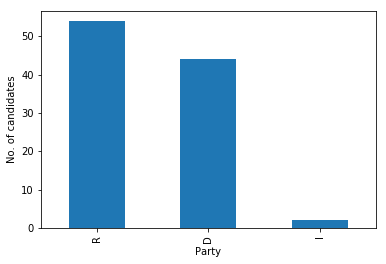

In [24]:
ct.plot(kind='bar')
plt.xlabel('Party')
plt.ylabel("No. of candidates")
plt.show()

<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>
والان لنتعرف على متوسط تصويت اعضاء مجلس الشيوخ في جلسات التصويت
</p>

In [25]:
votes.mean()

00001    0.325
00004    0.575
00005    0.535
00006    0.945
00007    0.545
00008    0.415
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00032    0.410
00038    0.480
00039    0.510
00044    0.460
00047    0.370
dtype: float64

<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>
لنرتب الناتج تصاعديا حتى نعرف ماهو اقل تصويت كان فيه توافق وماهو اكثر تصويت كان فيه توافق بأستخدام المثود sort_values

</p>

In [26]:
votes.mean().sort_values()

00001    0.325
00047    0.370
00032    0.410
00008    0.415
00044    0.460
00038    0.480
00039    0.510
00020    0.525
00005    0.535
00007    0.545
00009    0.545
00026    0.545
00004    0.575
00006    0.945
00010    0.985
dtype: float64

<p style="font-family: Arial; font-size:1.75em;color:#09bef3; font-style:bold; text-align:right; direction: rtl; font-weight: bold" ><br>

تحضير البيانات لبناء النموذج:
</p>
<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>

كما ذكرنا سابقا ان خوارزمية التكتل هي احد فروع التعليم بدون اشراف يعني ليس لدينا عمود Labels في البيانات او ليس لدينا y ولذلك سنستخدم خوارزمية التكتل من اجل انشاء عمود ال Labels من خلال التنبؤ به
<br>
الان سوف نقوم بتحضير البيانات والتي سوف نبني عليها النموذج وهذا البيانات تشمل جميع اعمدة التصويت يعني سوف نستبعد الاعمدة الثلاث الاولى والتي هي اسم السيناتور والحزب والولاية وسنختار باقي الاعمدة والتي هي اعمدة دعوات التصويت وسوف نخزن البيانات في متغير اسمه X

</p>

In [27]:
X = votes.iloc[:,3:]
X.head()

,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


<p style="font-family: Arial; font-size:1.75em;color:#09bef3; font-style:bold; text-align:right; direction: rtl; font-weight: bold" ><br>

بناء النموذج وتدريبه:
</p>

<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>
سوف نبني نموذجنا بأستخدام خوارزمية التكتل KMeans والتي تقوم بتجميع البيانات المتشابهة مع بعض على شكل مجموعة وقد تكون لدينا في البيانات العديد من المجموعات ومن اهم معلمات هذه الخوارزمية هي عدد الكتل n_clusters وسنتعلم في الدورات القادمة كيف نختار عدد الكتل الافضل لبياناتنا ولكن هنا في هذه البيانات واضح جدا انه لدينا مجموعتين ولذلك سنختار 2 وايضا سنضع رقم عشوائي ثابت random_state للخوارزمية حتى نحصل على نفس النتيجة في كل مرة نشغل فيها النموذج وسوف نخزن النموذج في متغير اسمه kmeans_model

</p>

In [28]:
kmeans_model = KMeans(n_clusters=2,random_state=1)


<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>
الان حتى ندرب النموذج على البيانات نحتاج الى المثود fit من داخل النموذج
<br>
وكما ذكرنا سابقا انه في نظام التعليم بدون اشراف لايوجد Labels هذا يعني انه لايوجد قيم نتنبئ بها
<br>
ولذلك لانستخدم predict في خوازرميات التكتل ولكن نستخدم بدلها transform
<br>

المثود transform تقوم بتطبيق ماتعلمه النموذج من البيانات التي تدرب عليها مثلا X والمعلمات التي تدرب عليها مثلا n_clusters=2 تقوم بتطبيق كل ذلك على بيانات اخرى وعلى سبيل المثال نقوم بتدريب النموذج بأستخدام fit على البيانات X ثم نقوم بتطبيق ماتعلمه النموذج على البيانات Z ولكن هنا ليس لدينا بيانات اخرى ولذلك سوف نقوم بتدريب النموذج وتطبيقه ايضا على X وبأمكاننا فعل ذلك بطريقتين وهما:

<br>
- تدريب النموذج على البيانات X بأستخدام fit ثم تطبيق النموذج على X بأستخدام transform يعني نقوم بالوظيفيتين بشكل منفصل
<br>
- اختصار الوظيفتين بوظيفة واحدة وهي تدريب وتطبيق بنفس الوقت fit_transform


</p>

In [32]:
senator_distances = kmeans_model.fit_transform(X)

<p style="font-family: Arial; font-size:1.75em;color:#09bef3; font-style:bold; text-align:right; direction: rtl; font-weight: bold" ><br>

طريقة عمل خوارزمية التكتل:

</p>

<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>
بعد ان اخترنا ان يكون لدينا كتلتين او مجموعتين n_clusters=2 قامت الخوارزمية بقسم البيانات الى مجموعتين هما 0,1 كل مجموعة تحتوي على بيانات متشابهة ومتقاربة جدا وربما ستسأل نفسك كيف قسمت الخوارزمية البيانات على اساس التشابه؟
<br>
والجواب البسيط هو تقوم الخوارزمية بأختيار سنتر لكل مجموعة وسنتعلم في الدورات القادمة كيف تختار هذا السنتر
<br>
ثم تقوم الخوارزمية بقياس المسافة بين كل نقطة والسنتر 0 والسنتر 1 حيث اذا كانت النقطة الفلانية اقرب الى سنتر المجموعة 0 هذا يعني ان هذه النقطة تقع في المجموعة الاولى اما اذا كانت اقرب الى سنتر المجموعة 1 هذا يعني ان هذه النقطة تقع ضمن المجموعة الثانية

</p>


<img src='https://lh3.googleusercontent.com/0fcZdqM2Rr3xQT55ljHVw6Kas9FyyHyDzH__h-zNZaDgSwAxHPkzG6M6hS_CQ6m0u4W07AFLwTRmMgaXzDgcgLz6igoiyzJTQw9HxPQgACRRYl0SnIMnsB4NXKBPc9rkqznAgKxTSw' /></a>



<p style="font-family: Arial; font-size:1.75em;color:#09bef3; font-style:bold; text-align:right; direction: rtl; font-weight: bold" ><br>

عمود ال Labels الذي تنبأت به خوارزمية التكتل:
</p>

<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>
لمعرفة عمود ال Labels الذي تنبئ به النموذج النموذج لكل سطر في بياناتنا او كل نقطة في الخوارزمية نحتاج الى استخدام المثود _labels من داخل النموذج والكود التالي يوضح ذلك كما سنقوم بخزن هذا العمود في متغير سوف نسميه labels
</p>

In [33]:
labels = kmeans_model.labels_
labels

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0])

<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>
وايضا بأمكاننا معرفة بعد جميع النقاط (كل نقطة تمثل سيناتور) عن سنتر المجموعة الاولى 0
</p>

In [36]:
senator_distances[:,0]

array([ 3.12141628,  2.6146248 ,  0.33960656,  3.42004795,  1.43833966,
        0.33960656,  3.42004795,  0.33960656,  3.42004795,  0.31287498,
        0.33960656,  3.27058526,  0.33960656,  3.34875646,  0.33960656,
        1.18084816,  1.23852221,  3.42004795,  3.42004795,  3.42004795,
        2.6146248 ,  0.58487332,  3.42004795,  3.42004795,  3.42004795,
        3.42004795,  3.56324683,  3.42004795,  1.73847904,  0.33960656,
        3.42004795,  3.42004795,  0.33960656,  3.42004795,  3.42004795,
        0.58487332,  3.27058526,  0.33960656,  3.19687093,  3.42004795,
        3.42004795,  0.76187197,  2.3965057 ,  3.28477567,  0.33960656,
        3.42004795,  3.42004795,  3.42004795,  3.42004795,  0.88867948,
        0.76187197,  3.01916091,  1.12020868,  3.56324683,  0.33960656,
        3.34962442,  2.78266771,  0.33960656,  3.42004795,  1.71151573,
        3.42004795,  0.33960656,  0.33960656,  0.33960656,  3.42004795,
        3.42004795,  0.33960656,  0.33960656,  1.01109315,  3.56

<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>


وبنفس الطريقة بأمكاننا معرفة بعد كل نقطة عن سنتر المجموعة الثانية 1
</p>

In [31]:
senator_distances[:,1]

array([ 1.3134775 ,  2.05339992,  3.41651746,  0.24198446,  2.96866004,
        3.41651746,  0.24198446,  3.41651746,  0.24198446,  3.30758755,
        3.41651746,  0.96734144,  3.41651746,  0.53945585,  3.41651746,
        3.12695614,  3.13536063,  0.24198446,  0.24198446,  0.24198446,
        2.05339992,  3.31421108,  0.24198446,  0.24198446,  0.24198446,
        0.24198446,  0.93036231,  0.24198446,  2.82326711,  3.41651746,
        0.24198446,  0.24198446,  3.41651746,  0.24198446,  0.24198446,
        3.31421108,  0.92088553,  3.41651746,  0.64668818,  0.24198446,
        0.24198446,  3.27225905,  2.27626086,  0.93974352,  3.41651746,
        0.24198446,  0.24198446,  0.24198446,  0.24198446,  3.27225905,
        3.27225905,  1.66141833,  3.12134058,  0.93036231,  3.41651746,
        1.10689798,  1.88408719,  3.41651746,  0.24198446,  2.80456307,
        0.24198446,  3.41651746,  3.41651746,  3.41651746,  0.24198446,
        0.24198446,  3.41651746,  3.41651746,  3.2936348 ,  0.93

<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>


والان لنضيف الى بياناتنا الاعمدة الثلاث التي استخرجناها من الخوارزمية وهي عمود ال Labels وعمود البعد عن سنتر الكتلة الاولى وعمود البعد عن سنتر الكتلة الثانية من اجل معرفة كل سيناتور في اي مجموعة وقع وكم هو بعيد او قريب عن المجموعة الثانية (الحزب الاخر) لان هذا يعطينا معلومات مهمة جدا 

<br>
حيث من الممكن ان يكون سيناتور ديمقراطي وقع في مجموعة الجمهوريين لقربه الشديد منهم وايضا هذا سيمكننا من معرفة اعضاء مجلس الشيوخ والذين يميلون الى الحزب الاخر لانهم سيكونون قريبين جدا من المجموعة الاخرى وسيمكننا ايضا من معرفة اعضاء مجلس الشيوخ المتحزبين جدا والذين بعيدين جدا عن الحزب الاخر ومختلفين معه بكل شيء

</p>

In [38]:
votes['labels'] = labels
votes['distance_cluster1'] = senator_distances[:,0]
votes['distance_cluster2'] = senator_distances[:,1]

In [43]:
votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,...,00020,00026,00032,00038,00039,00044,00047,labels,distance_cluster1,distance_cluster2
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,3.121416,1.313478
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,2.614625,2.053400
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0,0.339607,3.416517
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1,3.420048,0.241984
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,1.438340,2.968660


<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>

الان سوف ننشئ جدول بأستخدام الوظيفة crosstab من Pandas يوضح لنا عدد الديمقراطيين والجمهوريين والمستقلين الذين كانوا ضمن المجموعة الاولى او ضمن المجموعة الثانية
</p>

In [40]:
pd.crosstab(labels,votes['party'])

party,D,I,R
row_0,,,
0,41,2,0
1,3,0,54


<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>

وكما هو واضح ان عدد الديمقراطيين الذين كانوا ضمن المجموعة الاولى هو 41 بالاضافة الى 3 من الديمقراطيين كانوا ضمن مجموعة الحزب المنافس وهو حزب الجمهوريين وذلك لقرب هؤلاء الاعضاء من الجمهوريين في جلسات التصويت 
<br>
وايضا العضوين المستقلين وقعوا ضمن مجموعة الديمقراطيين وذلك لقربهما من هذا الحزب
<br>
واخيرا جميع اعضاء الحزب الجمهوري كانوا ضمن مجموعة واحدة وهذا يدل على التزامهم الشديد بتوجهات حزبهم
<br><br>
والان لنحول هذا الجدول الى رسم بياني من اجل التوضيح المجموعتين

</p>

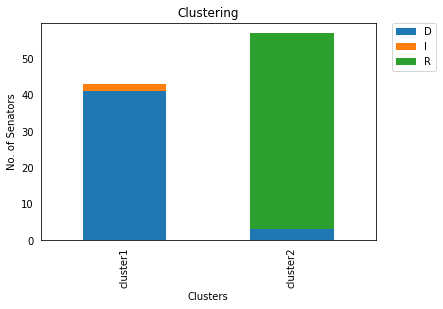

In [58]:
pd.crosstab(labels,votes['party']).plot(kind='bar',stacked=True)
x=[0,1]
l=['cluster1','cluster2']
plt.xticks(x,l)
plt.title('Clustering')
plt.xlabel('Clusters')
plt.ylabel('No. of Senators')
plt.tick_params(bottom='off',top='off',right='off',left='off')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>
والان لنستكشف اعضاء مجلس الشيوخ الذين كانوا في المجموعة المنافسة لحزبهم حيث كما علمنا سابقا انه هناك ثلاث اعضاء ديمقراطيين كانوا ضمن مجموعة الجمهوريين وقد يكون السبب وراء ذلك هو تصويت هؤلاء الاعضاء لصالح الجمهوريين في جلسات التصويت
<br>
ومن اجل عرض اسماء هؤلاء الاعضاء سوف نصنع فلتر فيه شرطين مربوطين ب and
<br>
الشرط الاول هو ان يكون قد وقع السيناتور في المجموعة الثانية 1
<br>
الشرط الثاني ان يكون السيناتور من حزب الديمقراطيين 

<br>
وسوف نعرض فقط عمود اسم السيناتور وعمود الحزب
</p>

In [44]:
democratic_outlier=votes[(labels==1) & (votes['party']=='D')]
democratic_outlier[['name','party']]

,name,party
42,Heitkamp,D
56,Manchin,D
74,Reid,D


<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>

وبنفس الطريقة سوف نستعرض اسماء الاعضاء المستقلين والذين وقعور ضمن مجموعة الديمقراطيين


</p>

In [45]:
independents_like_democrats=votes[(labels==0) &(votes['party']=='I')]
independents_like_democrats[['name','party']]

,name,party
50,King,I
79,Sanders,I


<p style="font-family: Arial; font-size:1.75em;color:#09bef3; font-style:bold; text-align:right; direction: rtl; font-weight: bold" ><br>

تصوير التباعد والتقارب بين المجموعتين: 
</p>

<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>

سوف نستخدم الرسم البياني المنتشر او المبعثر لتوضيح التباعد والتقارب بين المجموعتين التي تنبئ بها النموذج من اجل فهم قوة العلاقة والترابط بين الحزبين بشكل اكبر

</p>

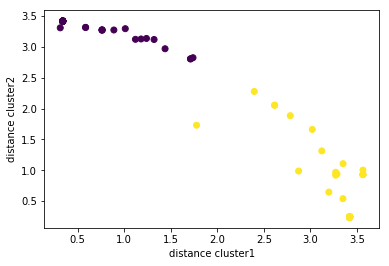

In [66]:
plt.scatter(x= votes['distance_cluster1'], y= votes['distance_cluster2'], c= votes['labels'])

plt.xlabel('distance cluster1')
plt.ylabel('distance cluster2')
plt.show()

<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>

وايضا بامكاننا استخدام الرسم البياني lmplot من مكتبة Seaborn لتوضيح العلاقة بين المجموعتين بشكل ارتب
</p>

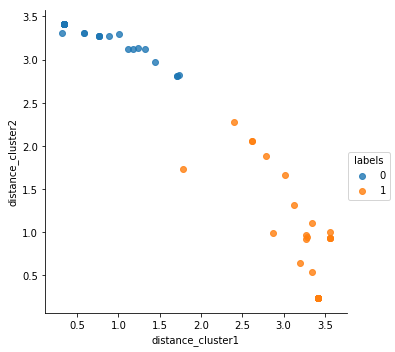

In [67]:
sns.lmplot(x='distance_cluster1',y='distance_cluster2',hue='labels',data=votes,fit_reg=False)
plt.show()

<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>

واخيرا بامكاننا معرفة اكثر اعضاء مجلس الشيوخ المتحزبين والمتعصبين من خلال الكود التالي الذي يرتب اعضاء مجلس الشيوخ حسب التعصب من الاشد تعصبا الى الاقل

</p>

In [141]:
extremism = (senator_distances ** 3).sum(axis=1)
votes['extremism'] = extremism
votes.sort_values('extremism',inplace=True,ascending=False)

In [142]:
votes[['name','party','extremism']].head(5)

,name,party,extremism
63,Mikulski,D,46.250476
85,Shaheen,D,46.046873
1,Ayotte,R,46.046873
8,Boozman,R,46.046873
21,Coons,D,46.046873


<br>

<p style="font-family: Arial;font-size:5em; color:#09bef3; font-style:bold; text-align:center">
Congratulations
</p>
<br>
<p style="font-family: Arial; font-size:1.2em;color:black; font-style:normal; text-align:right; direction: rtl"><br>
تهانينا لقد قمت بعمل عظيم حيث قمت بتحليل بيانات سياسية بأستخدام خوارزمية التكتل والتي تستخدم بشكل واسع جدا في عمليات تحليل البيانات واصبح بأمكانك الان استخدام هذه الخوارزمية في عدد كبير من انواع البيانات المشابهة والتي لايكون فيها عمود هدف وعلى سبيل المثال استخدام خوارزمية التكتل لتحليل بيانات عملاء الشركة من خلال تقسيم عملاء الشركة الى مجموعات مثلا على حسب فئاتهم العمرية او على حسب مستواهم التعليمي او استخدام هذه الخوارزمية لتحليل بيانات موقع الكتروني من خلال تقسيم زوار الموقع الى كتل حسب ساعات زيارتهم للموقع او حسب المناطق الجغرافية والخ.. من الامثلة الكثيرة ولذلك عليك تعلم هذه الخوارزمية واتقانها بالاضافة الى ان هناك العديد من التمارين في الدورة والتي تخص هذا المشروع عليك اكمالها من اجل تعلم بناء مشاريع بأستخدام هذه الخوارزمية واتقان هذه الخوارزمية بشكل اكبر واخيرا نتمنى ان تكون قد استمتعت في هذا المشروع ونتمنى ان تكون قد استفدت كثيرا منه
</p>

###### © Copyright LimFinity Institute of Technology 